## Calificaciones

In [36]:
import pandas as  pd
import numpy as np
import os

path_notas = 'calificaciones\\229_ICCD332_GR2CC_2024-1Calificaciones-B2.xlsx'
# path_prueba = 'calificaciones\\ArquitecturaComputadoresListaCalificaciones2024A.xlsx'
trabajos_df = pd.read_excel(path_notas, sheet_name='Calificaciones')
prueba_df = pd.read_excel(path_notas, sheet_name='PruebaBimestre2')
trabajos_df.shape, prueba_df.shape

((32, 26), (32, 10))

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
trabajos_df.sample(5)

,Nombre,Apellido(s),Número de ID,Institución,Departamento,Dirección de correo,Cuestionario:AI and Memory Wall Control de Lectura (Real),Tarea:Booteo de Ubuntu (Real),Tarea:Ocupación de Disco Duro (Real),Total Tarea (Real),Tarea:Proyecto Fin de Semestre (Real),Total Examen (Real),Taller:Evidencia Curso Ensamblaje Computadores (Real),Taller:Programando Python en Jupyter (Real),Taller:Comandos Emacs (Real),Taller:Programación de Scripts Python (Real),Taller:Taller de Comandos Linux (Real),Total Taller (Real),Ex:Exposición Buses (Real),Ex:Sistema de Memoria (Real),Ex:Memoria Externa (Real),Ex:Sistema de E/S (Real),Total Expo,Cuestionario:Prueba Segundo Bimestre (Real),Total PruebaB2 (Real),Total SegundoBimestre (Real)
30,JORGE LUIS,YANEZ SANDOVAL,NaN,NaN,NaN,jorge.yanez01@epn.edu.ec,10,0,9,12.67,10,20,7,9.8,9.5,9.0,9,17.72,10,10.0,10,9.0,19.50,17.00,17.00,17.38
20,ALICIA DAYANA,PEREIRA TUQUERES,NaN,NaN,NaN,alicia.pereira@epn.edu.ec,10,10,10,20.00,10,20,10,9.5,10.0,9.0,10,19.40,10,8.0,8,10.0,18.00,19.67,19.67,19.41
6,BORIS GABRIEL,GARCES PROAÑO,NaN,NaN,NaN,boris.garces@epn.edu.ec,10,10,7,18.00,8,16,7,9.5,8.0,10.0,8,17.00,7,8.0,6,0.0,14.00,18.50,18.50,16.70
15,LUIS ANGEL,MOROCHO SALAZAR,NaN,NaN,NaN,luis.morocho01@epn.edu.ec,10,0,10,13.33,4,8,10,10.0,7.5,9.0,0,14.60,10,7.5,10,10.0,18.75,20.00,20.00,14.94
19,JOHANN VLADIMIR,PASQUEL MONTENEGRO,NaN,NaN,NaN,johann.pasquel@epn.edu.ec,10,10,10,20.00,10,20,10,10.0,10.0,9.0,10,19.60,10,10.0,10,10.0,20.00,17.83,17.83,19.49


Limpiando las columnas del dataframe

In [39]:
import re
def transform_column_name(name):
    name = re.sub(r'[:\s/-]', '_', name)
    name = re.sub(r'[()]', '', name)
    name = re.sub(r'(\d+),\d+', r'\1', name)
    return name

trabajos_df.rename(columns=lambda x: transform_column_name(x), inplace=True)
trabajos_df.columns

Index(['Nombre', 'Apellidos', 'Número_de_ID', 'Institución', 'Departamento',
       'Dirección_de_correo',
       'Cuestionario_AI_and_Memory_Wall_Control_de_Lectura_Real',
       'Tarea_Booteo_de_Ubuntu_Real', 'Tarea_Ocupación_de_Disco_Duro_Real',
       'Total_Tarea_Real', 'Tarea_Proyecto_Fin_de_Semestre_Real',
       'Total_Examen_Real',
       'Taller_Evidencia_Curso_Ensamblaje_Computadores_Real',
       'Taller_Programando_Python_en_Jupyter_Real',
       'Taller_Comandos_Emacs_Real',
       'Taller_Programación_de_Scripts_Python_Real',
       'Taller_Taller_de_Comandos_Linux_Real', 'Total_Taller_Real',
       'Ex_Exposición_Buses_Real', 'Ex_Sistema_de_Memoria_Real',
       'Ex_Memoria_Externa_Real', 'Ex_Sistema_de_E_S_Real', 'Total_Expo',
       'Cuestionario_Prueba_Segundo_Bimestre_Real', 'Total_PruebaB2_Real',
       'Total_SegundoBimestre_Real'],
      dtype='object')

In [40]:
prueba_df.rename(columns=lambda x: transform_column_name(x), inplace=True)
prueba_df.columns

Index(['Apellidos', 'Nombre', 'Dirección_de_correo', 'Estado', 'Comenzado_el',
       'Finalizado', 'Tiempo_requerido', 'Calificación_20',
       'Calificación_20_Profesor', 'NotaFinal'],
      dtype='object')

In [41]:
# trabajos_df['Estudiante'] = trabajos_df.Apellido+' '+trabajos_df.Nombre

In [42]:
# trabajos_df.rename(columns={'Dirección de correo':'Email'}, inplace=True)

In [43]:
prueba_df.sample(5)

,Apellidos,Nombre,Dirección_de_correo,Estado,Comenzado_el,Finalizado,Tiempo_requerido,Calificación_20,Calificación_20_Profesor,NotaFinal
23,PAREDES LEON,JONATHAN VICENTE,jonathan.paredes01@epn.edu.ec,Finalizado,24 de julio de 2024 09:21,24 de julio de 2024 10:39,1 hora 18 minutos,17.80,17.30,17.55
16,CRIOLLO PAREDES,CHRISTOPHER ALEXANDER,christopher.criollo@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,15.00,17.00,16.00
25,JIMENEZ UNAUCHO,FREDDY ADHAYR,freddy.jimenez01@epn.edu.ec,Finalizado,24 de julio de 2024 09:21,24 de julio de 2024 10:19,57 minutos 19 segundos,19.00,18.50,18.75
29,RAURA ANTE,MARIA BELEN,maria.raura@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,16.33,16.83,16.58
14,OCHOA VELEZ,AUBERTIN LEANDRO,aubertin.ochoa@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,17.67,16.67,17.17


In [44]:
# prueba_df.rename(columns={'E-mail EPN':'Email'}, inplace=True)

In [45]:
email_label = 'Dirección_de_correo'

In [46]:
len(set(prueba_df[email_label]).intersection(trabajos_df[email_label]))

32

In [47]:
lista_total = pd.merge(prueba_df, trabajos_df, on=email_label, suffixes=['_1', '_2'], how='inner')
lista_total.shape, prueba_df.shape, trabajos_df.shape

((32, 35), (32, 10), (32, 26))

In [48]:
lista_total.head()

,Apellidos_1,Nombre_1,Dirección_de_correo,Estado,Comenzado_el,Finalizado,Tiempo_requerido,Calificación_20,Calificación_20_Profesor,NotaFinal,Nombre_2,Apellidos_2,Número_de_ID,Institución,Departamento,Cuestionario_AI_and_Memory_Wall_Control_de_Lectura_Real,Tarea_Booteo_de_Ubuntu_Real,Tarea_Ocupación_de_Disco_Duro_Real,Total_Tarea_Real,Tarea_Proyecto_Fin_de_Semestre_Real,Total_Examen_Real,Taller_Evidencia_Curso_Ensamblaje_Computadores_Real,Taller_Programando_Python_en_Jupyter_Real,Taller_Comandos_Emacs_Real,Taller_Programación_de_Scripts_Python_Real,Taller_Taller_de_Comandos_Linux_Real,Total_Taller_Real,Ex_Exposición_Buses_Real,Ex_Sistema_de_Memoria_Real,Ex_Memoria_Externa_Real,Ex_Sistema_de_E_S_Real,Total_Expo,Cuestionario_Prueba_Segundo_Bimestre_Real,Total_PruebaB2_Real,Total_SegundoBimestre_Real
0,PEREZ SEÑALIN,LUIS ENRIQUE,luis.perez05@epn.edu.ec,Finalizado,24 de julio de 2024 09:18,24 de julio de 2024 10:18,1 hora,16.83,17.83,17.33,LUIS ENRIQUE,PEREZ SEÑALIN,NaN,NaN,NaN,10,9,7,17.33,10,20,10,0.0,0.0,7.5,0,7.00,10,8.0,7,10.0,17.5,16.83,16.83,15.73
1,YANEZ SANDOVAL,JORGE LUIS,jorge.yanez01@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,17.00,18.00,17.50,JORGE LUIS,YANEZ SANDOVAL,NaN,NaN,NaN,10,0,9,12.67,10,20,7,9.8,9.5,9.0,9,17.72,10,10.0,10,9.0,19.5,17.00,17.00,17.38
2,LOPEZ NUÑEZ,HODALYS ANAHI,hodalys.lopez@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,17.00,18.00,17.50,HODALYS ANAHI,LOPEZ NUÑEZ,NaN,NaN,NaN,10,10,10,20.00,8,16,9,10.0,10.0,10.0,9,19.20,10,8.0,10,7.0,17.5,17.00,17.00,17.94
3,JIMENEZ ROMERO,JOSEPH ANDRES,joseph.jimenez@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,14.93,15.93,15.43,JOSEPH ANDRES,JIMENEZ ROMERO,NaN,NaN,NaN,10,10,10,20.00,6,12,10,10.0,10.0,9.0,10,19.60,7,10.0,10,7.0,17.0,14.93,14.93,16.71
4,PINEDA TORRES,MOISES SANTIAGO,moises.pineda@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:18,58 minutos 57 segundos,17.67,18.17,17.92,MOISES SANTIAGO,PINEDA TORRES,NaN,NaN,NaN,10,7,10,18.00,10,20,10,10.0,10.0,9.0,9,19.20,10,8.0,10,10.0,19.0,17.67,17.67,18.77


## Funciones de Cálculo

Considere las ponderaciones

- 20% Tareas
- 25% Talleres/Practicas
- 25% Prueba
- 30% Examen

In [74]:
def promediar_notas(*args):
    """_summary_
    promedia la nota
    Returns:
        _type_: _description_
    """
    x = np.array([i for i in args])
    return x.mean()


def promediar_notas_columns_array(row, columns):
    """_summary_
    promedia la nota
    Returns:
        _type_: _description_
    """
    x = np.array([row[col] for col in columns])
    return x.mean()


def nota_sobre_base(nota, escala_inicial=100, escala_final=10):
    """_summary_

    Args:
        nota (_type_): valor de la nota
        escala_inicial (int, optional): escala original de la nota e.g. sobre 100. Defaults to 100.
        escala_final (int, optional): escala deseada final de la nota e.g. sobre 10. Defaults to 10.

    Returns:
        _type_: _description_
    """
    return escala_final/escala_inicial*nota

def nota_final(prom_tareas, prom_tallers, prueba, examen, porcentaje_dict={'tareas':0.2, 'taller':0.25, 'prueba':0.25, 'examen':0.3}):
    promedio_final = np.average([prom_tareas, prom_tallers, prueba, examen], weights=[porcentaje_dict.get('tareas'),
                                                                            porcentaje_dict.get('taller'),
                                                                            porcentaje_dict.get('prueba'),
                                                                            porcentaje_dict.get('examen')])
    # promedio_redondeado = np.round(promedio_final, 2)
    return promedio_final



In [50]:
lista_total.columns

Index(['Apellidos_1', 'Nombre_1', 'Dirección_de_correo', 'Estado',
       'Comenzado_el', 'Finalizado', 'Tiempo_requerido', 'Calificación_20',
       'Calificación_20_Profesor', 'NotaFinal', 'Nombre_2', 'Apellidos_2',
       'Número_de_ID', 'Institución', 'Departamento',
       'Cuestionario_AI_and_Memory_Wall_Control_de_Lectura_Real',
       'Tarea_Booteo_de_Ubuntu_Real', 'Tarea_Ocupación_de_Disco_Duro_Real',
       'Total_Tarea_Real', 'Tarea_Proyecto_Fin_de_Semestre_Real',
       'Total_Examen_Real',
       'Taller_Evidencia_Curso_Ensamblaje_Computadores_Real',
       'Taller_Programando_Python_en_Jupyter_Real',
       'Taller_Comandos_Emacs_Real',
       'Taller_Programación_de_Scripts_Python_Real',
       'Taller_Taller_de_Comandos_Linux_Real', 'Total_Taller_Real',
       'Ex_Exposición_Buses_Real', 'Ex_Sistema_de_Memoria_Real',
       'Ex_Memoria_Externa_Real', 'Ex_Sistema_de_E_S_Real', 'Total_Expo',
       'Cuestionario_Prueba_Segundo_Bimestre_Real', 'Total_PruebaB2_Real',
      

In [61]:
tareas_columns = [x for x in lista_total.columns if 'Tarea' in x and not 'Total' in x ]
taller_columns = [x for x in lista_total.columns if 'Taller' in x and not 'Total' in x ]
expo_columns = [x for x in lista_total.columns if 'Expo' in x and  'Total' in x ]
tareas_columns

['Tarea_Booteo_de_Ubuntu_Real',
 'Tarea_Ocupación_de_Disco_Duro_Real',
 'Tarea_Proyecto_Fin_de_Semestre_Real']

In [62]:
taller_columns

['Taller_Evidencia_Curso_Ensamblaje_Computadores_Real',
 'Taller_Programando_Python_en_Jupyter_Real',
 'Taller_Comandos_Emacs_Real',
 'Taller_Programación_de_Scripts_Python_Real',
 'Taller_Taller_de_Comandos_Linux_Real']

In [63]:
expo_columns

['Total_Expo']

In [66]:
taller_columns += expo_columns
taller_columns

['Taller_Evidencia_Curso_Ensamblaje_Computadores_Real',
 'Taller_Programando_Python_en_Jupyter_Real',
 'Taller_Comandos_Emacs_Real',
 'Taller_Programación_de_Scripts_Python_Real',
 'Taller_Taller_de_Comandos_Linux_Real',
 'Total_Expo']

Voy a formar un conjunto de columnas incluyendo el total de exposiciones en talleres. Sin embargo, tengo que reescalar ya que la nota esta sobre 20 para la exposición

In [64]:
lista_total[expo_columns[0]].head()

0    17.5
1    19.5
2    17.5
3    17.0
4    19.0
Name: Total_Expo, dtype: float64

In [65]:
lista_total[expo_columns[0]] = lista_total[expo_columns[0]].apply(lambda x: x*10/20)
lista_total[expo_columns[0]].head()

0    8.75
1    9.75
2    8.75
3    8.50
4    9.50
Name: Total_Expo, dtype: float64

In [75]:
# lista_total["PromedioTareas"] = lista_total.apply(lambda x: promediar_notas(x['Tarea1'], x['Tarea2'], x['Tarea3']), axis=1)
lista_total["PromedioTareas"] = lista_total.apply(lambda x: promediar_notas_columns_array(x, tareas_columns), axis=1)
# lista_total["PromedioTalleres"] = lista_total.apply(lambda x: promediar_notas(x['Taller1'], x['Taller2'], x['Taller3'], x['Taller4'], x['Taller5'], x['Taller6']), axis=1)
lista_total["PromedioTalleres"] = lista_total.apply(lambda x: promediar_notas_columns_array(x, taller_columns), axis=1)

In [80]:
lista_total.head()

,Apellidos_1,Nombre_1,Dirección_de_correo,Estado,Comenzado_el,Finalizado,Tiempo_requerido,Calificación_20,Calificación_20_Profesor,PruebaBimestre2,Nombre_2,Apellidos_2,Número_de_ID,Institución,Departamento,Cuestionario_AI_and_Memory_Wall_Control_de_Lectura_Real,Tarea_Booteo_de_Ubuntu_Real,Tarea_Ocupación_de_Disco_Duro_Real,Total_Tarea_Real,Tarea_Proyecto_Fin_de_Semestre_Real,Total_Examen_Real,Taller_Evidencia_Curso_Ensamblaje_Computadores_Real,Taller_Programando_Python_en_Jupyter_Real,Taller_Comandos_Emacs_Real,Taller_Programación_de_Scripts_Python_Real,Taller_Taller_de_Comandos_Linux_Real,Total_Taller_Real,Ex_Exposición_Buses_Real,Ex_Sistema_de_Memoria_Real,Ex_Memoria_Externa_Real,Ex_Sistema_de_E_S_Real,Total_Expo,Cuestionario_Prueba_Segundo_Bimestre_Real,Total_PruebaB2_Real,Total_SegundoBimestre_Real,PromedioTareas,PromedioTalleres
0,PEREZ SEÑALIN,LUIS ENRIQUE,luis.perez05@epn.edu.ec,Finalizado,24 de julio de 2024 09:18,24 de julio de 2024 10:18,1 hora,16.83,17.83,17.33,LUIS ENRIQUE,PEREZ SEÑALIN,NaN,NaN,NaN,10,9,7,17.33,10,20,10,0.0,0.0,7.5,0,7.00,10,8.0,7,10.0,8.75,16.83,16.83,15.73,17.333333,8.750000
1,YANEZ SANDOVAL,JORGE LUIS,jorge.yanez01@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,17.00,18.00,17.50,JORGE LUIS,YANEZ SANDOVAL,NaN,NaN,NaN,10,0,9,12.67,10,20,7,9.8,9.5,9.0,9,17.72,10,10.0,10,9.0,9.75,17.00,17.00,17.38,12.666667,18.016667
2,LOPEZ NUÑEZ,HODALYS ANAHI,hodalys.lopez@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,17.00,18.00,17.50,HODALYS ANAHI,LOPEZ NUÑEZ,NaN,NaN,NaN,10,10,10,20.00,8,16,9,10.0,10.0,10.0,9,19.20,10,8.0,10,7.0,8.75,17.00,17.00,17.94,18.666667,18.916667
3,JIMENEZ ROMERO,JOSEPH ANDRES,joseph.jimenez@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,14.93,15.93,15.43,JOSEPH ANDRES,JIMENEZ ROMERO,NaN,NaN,NaN,10,10,10,20.00,6,12,10,10.0,10.0,9.0,10,19.60,7,10.0,10,7.0,8.50,14.93,14.93,16.71,17.333333,19.166667
4,PINEDA TORRES,MOISES SANTIAGO,moises.pineda@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:18,58 minutos 57 segundos,17.67,18.17,17.92,MOISES SANTIAGO,PINEDA TORRES,NaN,NaN,NaN,10,7,10,18.00,10,20,10,10.0,10.0,9.0,9,19.20,10,8.0,10,10.0,9.50,17.67,17.67,18.77,18.000000,19.166667


In [79]:
lista_total.rename(columns={'NotaFinal':'PruebaBimestre2'}, inplace=True)

In [280]:
# lista_total["Prueba_100"] = lista_total["NotaPrueba"].apply(lambda x: nota_sobre_base(x, escala_inicial=10, escala_final=100))

In [77]:
lista_total['PromedioTalleres'] = lista_total['PromedioTalleres'].apply(lambda x: nota_sobre_base(nota=x, escala_final=20,escala_inicial=10 ))
lista_total['PromedioTareas'] = lista_total['PromedioTareas'].apply(lambda x: nota_sobre_base(nota=x, escala_final=20,escala_inicial=10 ))

Para obtener la nota total se requiere

- 20% Tareas
- 25% Talleres/Practicas
- 25% Prueba
- 30% Examen

In [81]:
lista_total["NotaFinalB2_20"] = lista_total.apply(lambda x: nota_final(prom_tareas=x["PromedioTareas"],
                                                                      prom_tallers=x["PromedioTalleres"],
                                                                      prueba=x["PruebaBimestre2"],
                                                                      examen=x["Total_Examen_Real"]), axis=1)

In [282]:
# lista_total["NotaFinal_10"] = lista_total["NotaFinal_100"].apply(lambda x: nota_sobre_base(x, escala_inicial=100, escala_final=10))

In [283]:
# lista_total["NotaFinalB1_20"] = lista_total["NotaFinal_100"].apply(lambda x: nota_sobre_base(x, escala_inicial=100, escala_final=20))

In [82]:
lista_total.NotaFinalB2_20.describe()

count    32.000000
mean     17.559909
std       1.531990
min      12.902083
25%      16.904167
50%      17.747500
75%      18.830417
max      19.709167
Name: NotaFinalB2_20, dtype: float64

Text(0.5, 1.0, 'Histograma Nota Primer Bimestre')

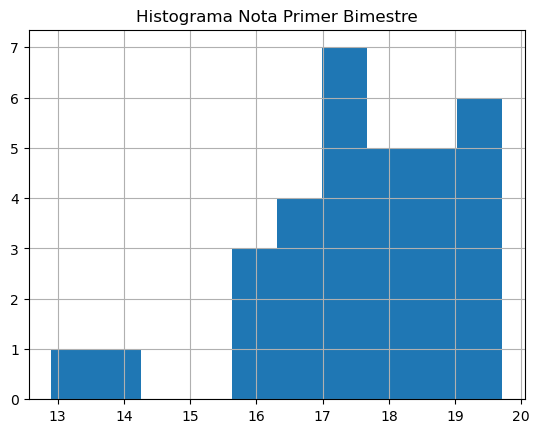

In [83]:
import matplotlib.pyplot as plt
lista_total.NotaFinalB2_20.hist(bins=10)
plt.title('Histograma Nota Primer Bimestre')

In [84]:
# lista_total[lista_total.NotaFinal_10==lista_total.NotaFinal_10.max()]

In [85]:
lista_total.sort_values(by="NotaFinalB2_20", ascending=True).head()

,Apellidos_1,Nombre_1,Dirección_de_correo,Estado,Comenzado_el,Finalizado,Tiempo_requerido,Calificación_20,Calificación_20_Profesor,PruebaBimestre2,Nombre_2,Apellidos_2,Número_de_ID,Institución,Departamento,Cuestionario_AI_and_Memory_Wall_Control_de_Lectura_Real,Tarea_Booteo_de_Ubuntu_Real,Tarea_Ocupación_de_Disco_Duro_Real,Total_Tarea_Real,Tarea_Proyecto_Fin_de_Semestre_Real,Total_Examen_Real,Taller_Evidencia_Curso_Ensamblaje_Computadores_Real,Taller_Programando_Python_en_Jupyter_Real,Taller_Comandos_Emacs_Real,Taller_Programación_de_Scripts_Python_Real,Taller_Taller_de_Comandos_Linux_Real,Total_Taller_Real,Ex_Exposición_Buses_Real,Ex_Sistema_de_Memoria_Real,Ex_Memoria_Externa_Real,Ex_Sistema_de_E_S_Real,Total_Expo,Cuestionario_Prueba_Segundo_Bimestre_Real,Total_PruebaB2_Real,Total_SegundoBimestre_Real,PromedioTareas,PromedioTalleres,NotaFinalB2_20
22,MOROCHO SALAZAR,LUIS ANGEL,luis.morocho01@epn.edu.ec,Finalizado,24 de julio de 2024 09:20,24 de julio de 2024 10:21,1 hora,20.00,18.50,19.25,LUIS ANGEL,MOROCHO SALAZAR,NaN,NaN,NaN,10,0,10,13.33,4,8,10,10.0,7.5,9.0,0,14.6,10,7.5,10,10.0,9.375,20.00,20.00,14.94,9.333333,15.291667,12.902083
13,PAILLACHO PAILLACHO,KEVIN ALEXANDER,kevin.paillacho@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,20.00,19.50,19.75,KEVIN ALEXANDER,PAILLACHO PAILLACHO,NaN,NaN,NaN,10,7,10,18.00,5,10,9,10.0,7.5,0.0,0,10.6,10,8.0,10,9.5,9.375,20.00,20.00,15.47,14.666667,11.958333,13.860417
3,JIMENEZ ROMERO,JOSEPH ANDRES,joseph.jimenez@epn.edu.ec,Finalizado,24 de julio de 2024 09:19,24 de julio de 2024 10:19,1 hora,14.93,15.93,15.43,JOSEPH ANDRES,JIMENEZ ROMERO,NaN,NaN,NaN,10,10,10,20.00,6,12,10,10.0,10.0,9.0,10,19.6,7,10.0,10,7.0,8.500,14.93,14.93,16.71,17.333333,19.166667,15.715833
0,PEREZ SEÑALIN,LUIS ENRIQUE,luis.perez05@epn.edu.ec,Finalizado,24 de julio de 2024 09:18,24 de julio de 2024 10:18,1 hora,16.83,17.83,17.33,LUIS ENRIQUE,PEREZ SEÑALIN,NaN,NaN,NaN,10,9,7,17.33,10,20,10,0.0,0.0,7.5,0,7.0,10,8.0,7,10.0,8.750,16.83,16.83,15.73,17.333333,8.750000,15.986667
23,PAREDES LEON,JONATHAN VICENTE,jonathan.paredes01@epn.edu.ec,Finalizado,24 de julio de 2024 09:21,24 de julio de 2024 10:39,1 hora 18 minutos,17.80,17.30,17.55,JONATHAN VICENTE,PAREDES LEON,NaN,NaN,NaN,10,7,7,16.00,8,16,10,10.0,7.0,9.0,6,16.8,10,10.0,8,0.0,7.000,17.80,17.80,16.12,14.666667,16.333333,16.204167


In [86]:
lista_total.columns

Index(['Apellidos_1', 'Nombre_1', 'Dirección_de_correo', 'Estado',
       'Comenzado_el', 'Finalizado', 'Tiempo_requerido', 'Calificación_20',
       'Calificación_20_Profesor', 'PruebaBimestre2', 'Nombre_2',
       'Apellidos_2', 'Número_de_ID', 'Institución', 'Departamento',
       'Cuestionario_AI_and_Memory_Wall_Control_de_Lectura_Real',
       'Tarea_Booteo_de_Ubuntu_Real', 'Tarea_Ocupación_de_Disco_Duro_Real',
       'Total_Tarea_Real', 'Tarea_Proyecto_Fin_de_Semestre_Real',
       'Total_Examen_Real',
       'Taller_Evidencia_Curso_Ensamblaje_Computadores_Real',
       'Taller_Programando_Python_en_Jupyter_Real',
       'Taller_Comandos_Emacs_Real',
       'Taller_Programación_de_Scripts_Python_Real',
       'Taller_Taller_de_Comandos_Linux_Real', 'Total_Taller_Real',
       'Ex_Exposición_Buses_Real', 'Ex_Sistema_de_Memoria_Real',
       'Ex_Memoria_Externa_Real', 'Ex_Sistema_de_E_S_Real', 'Total_Expo',
       'Cuestionario_Prueba_Segundo_Bimestre_Real', 'Total_PruebaB2_Real',


In [87]:
toreport = lista_total[['Apellidos_1', 'Nombre_1', 'Dirección_de_correo', 'PruebaBimestre2']+tareas_columns+['PromedioTareas']+taller_columns+['PromedioTalleres','Total_Examen_Real', 'NotaFinalB2_20']].round(2)
toreport.head()

,Apellidos_1,Nombre_1,Dirección_de_correo,PruebaBimestre2,Tarea_Booteo_de_Ubuntu_Real,Tarea_Ocupación_de_Disco_Duro_Real,Tarea_Proyecto_Fin_de_Semestre_Real,PromedioTareas,Taller_Evidencia_Curso_Ensamblaje_Computadores_Real,Taller_Programando_Python_en_Jupyter_Real,Taller_Comandos_Emacs_Real,Taller_Programación_de_Scripts_Python_Real,Taller_Taller_de_Comandos_Linux_Real,Total_Expo,PromedioTalleres,Total_Examen_Real,NotaFinalB2_20
0,PEREZ SEÑALIN,LUIS ENRIQUE,luis.perez05@epn.edu.ec,17.33,9,7,10,17.33,10,0.0,0.0,7.5,0,8.75,8.75,20,15.99
1,YANEZ SANDOVAL,JORGE LUIS,jorge.yanez01@epn.edu.ec,17.50,0,9,10,12.67,7,9.8,9.5,9.0,9,9.75,18.02,20,17.41
2,LOPEZ NUÑEZ,HODALYS ANAHI,hodalys.lopez@epn.edu.ec,17.50,10,10,8,18.67,9,10.0,10.0,10.0,9,8.75,18.92,16,17.64
3,JIMENEZ ROMERO,JOSEPH ANDRES,joseph.jimenez@epn.edu.ec,15.43,10,10,6,17.33,10,10.0,10.0,9.0,10,8.50,19.17,12,15.72
4,PINEDA TORRES,MOISES SANTIAGO,moises.pineda@epn.edu.ec,17.92,7,10,10,18.00,10,10.0,10.0,9.0,9,9.50,19.17,20,18.87


In [88]:
toreport.sort_values(by='Apellidos_1', inplace=True)

In [89]:
toreport.to_markdown(os.path.join('calificaciones', "notasBimestre2.md"), index=False)
toreport.to_latex(os.path.join('calificaciones', "notasBimestre2.tex"), index=False)
toreport.to_excel(os.path.join('calificaciones', "notasBimestre2.xlsx"), index=False)